In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

import torch
import torch.nn as nn

In [5]:
df = pd.read_csv('netflix.csv')
closed_prices = df["Close"]

In [8]:
seq_len = 15
scaler = MinMaxScaler()
scaled_price = scaler.fit_transform(np.array(closed_prices)[..., None]).squeeze()
scaled_price.shape

(4881,)

In [12]:
X= []
y =[]

for i in range(len(scaled_price)-seq_len):
  X.append(scaled_price[i:i+seq_len])
  y.append(scaled_price[i+seq_len])
X = np.array(X)[... , None]
y = np.array(y)[... , None]
X.shape, y.shape

((4866, 15, 1), (4866, 1))

In [21]:
train_x = torch.from_numpy(X[:int(0.8*X.shape[0])]).float()
train_y = torch.from_numpy(y[:int(0.8*X.shape[0])]).float()
test_x = torch.from_numpy(X[int(0.8*X.shape[0]):]).float()
test_y = torch.from_numpy(y[int(0.8*X.shape[0]):]).float()

In [16]:
class Model(nn.Module):
  def __init__(self , input_size , hidden_size):
        super().__init__()
        self.lstm = nn.LSTM(input_size , hidden_size , batch_first = True)
        self.fc = nn.Linear(hidden_size , 1)
  def forward(self,x):
    output, (hidden, cell) = self.lstm(x)
    return self.fc(hidden[-1,:])

model = Model(1,64)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn = nn.MSELoss()

num_epochs = 100

for epoch in range(num_epochs):
  output = model(train_x)
  loss = loss_fn(output , train_y)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  if epoch % 10 == 0 and epoch != 0:
      print(epoch , "epoch loss" , loss.detach().numpy())

model.eval()
with torch.no_grad():
    output = model(test_x)

10 epoch loss 0.0045948178
20 epoch loss 0.004005106
30 epoch loss 0.0029058675
40 epoch loss 0.00050893397
50 epoch loss 4.3950982e-05
60 epoch loss 0.00012114453
70 epoch loss 6.1896295e-05
80 epoch loss 3.2242795e-05
90 epoch loss 2.1384787e-05


In [22]:
output.shape, test_y.shape

(torch.Size([974, 1]), torch.Size([974, 1]))

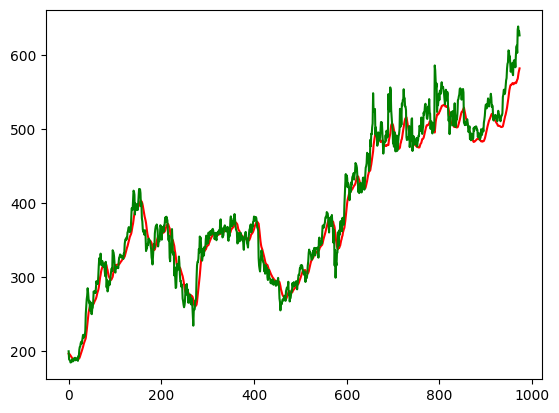

In [23]:
pred = scaler.inverse_transform(output.numpy())
real = scaler.inverse_transform(test_y.numpy())

plt.plot(pred.squeeze() , color = "red" , label = "predicted")
plt.plot(real.squeeze() , color = "green" , label = "real")
plt.show()

In [28]:
class Model(nn.Module):
  def __init__(self , input_size , hidden_size):
        super().__init__()
        self.lstm = nn.LSTM(input_size , hidden_size , batch_first = True)
        self.fc = nn.Linear(hidden_size , 1)
  def forward(self,x):
    output, (hidden, cell) = self.lstm(x)
    print("x, output, hidden",x.shape, output.shape, hidden.shape, output[:,-1,:].shape, hidden[-1,:].shape)
    return self.fc(hidden[-1,:])

model = Model(1,64)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn = nn.MSELoss()

num_epochs = 100

for epoch in range(num_epochs):
  output = model(train_x)
  break
  loss = loss_fn(output , train_y)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  if epoch % 10 == 0 and epoch != 0:
      print(epoch , "epoch loss" , loss.detach().numpy())

model.eval()
with torch.no_grad():
    output = model(test_x)

x, output, hidden torch.Size([3892, 15, 1]) torch.Size([3892, 15, 64]) torch.Size([1, 3892, 64]) torch.Size([3892, 64]) torch.Size([3892, 64])
x, output, hidden torch.Size([974, 15, 1]) torch.Size([974, 15, 64]) torch.Size([1, 974, 64]) torch.Size([974, 64]) torch.Size([974, 64])
